In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymatgen
import glob
import pandas as pd

In [130]:
mp_139K_dir = '/Users/chimamcgruder/Work_General/ClimateBase/Materials/crystal_untagged_800K-main/dataset/mp_139K/'
crystals = glob.glob(mp_139K_dir+'*.cif')
print (len(crystals))

139308


Start using the features highlighted in https://arxiv.org/pdf/2301.03372 (**TODO: maybe add more features, plenty more atomic features pymatgen has**):<br>
-electronegativity (X),  <br>
-cation electronegativity (**TODO: have to find an effective way to get the cations from here**), <br>
-atomic radius (atomic_radius),<br>
-van der waals radius (van_der_waals_radius), <br>
-Mendeleev number (mendeleev_no), <br>
-electrical resistivity (electrical_resistivity, TODO: need to check what conditions they using), <br>
-molar volume (molar_volume, TODO: need to check what conditions they using. Cause at stp it's always 22.4 L/mol for a gas), <br>
-thermal conductivity (thermal_conductivity), <br>
-boiling point (boiling_point), <br>
-melting point (melting_point), <br>
-critical temperature (critical_temperature), <br>
-superconduction temperature (superconduction_temperature), <br>
-bulk modulus (bulk_modulus), <br>
-youngs modulus (youngs_modulus), <br>
-Brinell hardness (brinell_hardness), <br>
-rigidity modulus (rigidity_modulus), <br>
-mineral hardness (mineral_hardness), <br>
-vickers hardness (vickers_hardness), <br>
-density of solid (density_of_solid), <br>
-first ionization energy (ionization_energies - gotta make sure I take the first ionization energy [0]), <br>

**TODO: Check out pymatgen calculates these values, because a lot of them depend on specific conditions. It might not matter, so long as I'm consistent, but I'd at least want to know the discrepencies between one value from the next.**

## To get the matrix and lattice paramters, so we have parameters that are unique to the specific crystal. All other above parameters could have the same value for a different crystal if it's the same atoms 

In [132]:
rand_crys_i = random.randint(0, len(crystals))
structure = Structure.from_file(mp_139K_dir+'81450.cif')
composition = structure.composition
print (composition)

Na16 Xe4 O48


In [149]:
# To get matrix dimension:
DisMatrx = structure.distance_matrix
DisMatrx = DisMatrx.flatten()
print (DisMatrx.shape)
DisMatrx = DisMatrx[np.where(DisMatrx > 0)[0]] #don't want to include distance to itself
print (DisMatrx.shape)
maxDist, meanDist, stdDist, minDist = np.max(DisMatrx), np.mean(DisMatrx), np.std(DisMatrx), np.min(DisMatrx)
print ("maxDist, meanDist, stdDist, minDist:", maxDist, meanDist, stdDist, minDist)

(4624,)
(4556,)
maxDist, meanDist, stdDist, minDist: 9.568890184813787 5.555222090116371 1.7044884995036205 1.2563290645967466


In [152]:
# Lattice parameters:
a_param, b_param, c_param = structure.lattice.abc[0], structure.lattice.abc[1], structure.lattice.abc[2]
alpha_param, beta_param, gamma_param = structure.lattice.angles[0], structure.lattice.angles[1], structure.lattice.angles[2]
print ('Lattice Params: a =', a_param, 'b =', b_param, 'c =', c_param, 'alpah =', alpha_param, 'beta =',beta_param, 'gamma =', gamma_param)

Lattice Params: a = 7.152824 b = 11.614817 c = 14.47931 alpah = 90.0 beta = 90.0 gamma = 90.0


In [249]:
df = pd.read_csv(fullCSV, index_col=[0])
bnd_gp = df.iloc[:,-1] #want the band_gap into to still be last
E = np.empty([bnd_gp.shape[0]])
print (E.shape)

(30792,)


In [252]:
fullCSV = '/Users/chimamcgruder/Work_General/ClimateBase/Materials/MLtests/mp_139K_11feat/Feature_BandGap_DATA_NOconductors.csv'
df = pd.read_csv(fullCSV, index_col=[0])
bnd_gp = df.iloc[:,-1] #want the band_gap into to still be last
modified_df = df.iloc[:,:-1]
#### add more columns for matrix and lattice parameters
newParams = ['maxDist', 'meanDist', 'stdDist', 'minDist', 'a', 'b', 'c', 'alpah', 'beta', 'gamma']
new_columns = {param: np.empty(modified_df.shape[0]) for param in newParams} # Create a dictionary of new columns with empty arrays
modified_df = modified_df.assign(**new_columns) # Assign new columns to the DataFrame
molecule = list(df.index[:])
for m in molecule:
    CiF = m.split('_')[1]
    structure = Structure.from_file(mp_139K_dir+CiF)
    composition = structure.composition
    maxDist, meanDist, stdDist, minDist = np.max(DisMatrx), np.mean(DisMatrx), np.std(DisMatrx), np.min(DisMatrx)
    a_param, b_param, c_param = structure.lattice.abc[0], structure.lattice.abc[1], structure.lattice.abc[2]
    alpha_param, beta_param, gamma_param = structure.lattice.angles[0], structure.lattice.angles[1], structure.lattice.angles[2]
    newVals = [maxDist, meanDist, stdDist, minDist, a_param, b_param, c_param, alpha_param, beta_param, gamma_param]
    for i in range(len(newVals)):
        modified_df.at[m, newParams[i]] = newVals[i]

/opt/miniconda3/envs/ML/lib/python3.11/site-packages/pymatgen/io/cif.py:1229: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/opt/miniconda3/envs/ML/lib/python3.11/site-packages/pymatgen/io/cif.py:1229: UserWarning: Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/opt/miniconda3/envs/ML/lib/python3.11/site-packages/pymatgen/io/cif.py:1229: UserWarning: Issues encountered while parsing CIF: 12 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/opt/miniconda3/envs/ML/lib/python3.11/site-packages/pymatgen/io/cif.py:1229: UserWarning: Is

KeyboardInterrupt: 

## To check which crystals have the exact same parameters (need to do this to see if the lattice and matrix dimension are actually unique per crystal):


In [260]:
fullCSV = '/Users/chimamcgruder/Work_General/ClimateBase/Materials/MLtests/mp_139K_11feat/Feature_BandGap_DATA_NOconductors_LatticMatrix.csv'
df = pd.read_csv(fullCSV, index_col=[0])
print ('shape of dataframe:', df.shape)
Xdf = list(df.index[:])
duplicates = {}
for crst in range(len(Xdf)): #to get all of the duplicate crystal components. These aren't the same thing as duplicate structures
    ReducedComp = Xdf[crst].split('_')[0]
    if ReducedComp in duplicates.keys():
        duplicates[ReducedComp][0] +=1 #total number of duplicates with the same reduced compound
        duplicates[ReducedComp][1].append(crst)  #to keep track of where the duplicates are
    else: #if this is the first time seeing reduced compound
        duplicates[ReducedComp] = [0, [crst]] #save it's info for later, in case it comes up again
print ('total number of .cif files:', crst+1)
print ('number of different reduced compounds:', len(list(duplicates.keys())))
for d in list(duplicates.keys()): #now to remove all the components that weren't actually duplicates
    if duplicates[d][0] == 0:
        del duplicates[d]     
print ('number of duplicate compounds:', len(list(duplicates.keys())), '\n\n')

for d in list(duplicates.keys()):
    print (d+':')
    for idx in duplicates[d][1]:
        for i in df.iloc[idx,:].values:
            print (round(i, 2), end=', ')
        print ('')
    print ('\n')

shape of dataframe: (38029, 22)
total number of .cif files: 38029
number of different reduced compounds: 18402
number of duplicate compounds: 2570 


Li2VCrO4:
5.4, 2.38, 1.01, 1.73, 67.38, 13.88, 36.89, 1276.85, 686.2, 9.85, 85.5, 2.99, 2.15, 0.89, 0.0, 2.97, 5.18, 5.14, 81.06, 90.0, 73.35, 0.67, 
5.4, 2.38, 1.01, 1.73, 67.38, 13.88, 36.89, 1276.85, 686.2, 9.85, 85.5, 4.23, 2.6, 0.92, 0.0, 6.0, 5.14, 5.15, 71.0, 90.0, 90.0, 1.72, 
5.4, 2.38, 1.01, 1.73, 67.38, 13.88, 36.89, 1276.85, 686.2, 9.85, 85.5, 5.21, 3.15, 1.33, 0.0, 2.97, 5.13, 9.92, 99.19, 89.96, 90.01, 0.67, 
5.4, 2.38, 1.01, 1.73, 67.38, 13.88, 36.89, 1276.85, 686.2, 9.85, 85.5, 4.19, 2.59, 0.91, 0.0, 5.98, 5.98, 5.98, 120.59, 120.45, 89.11, 1.59, 
5.4, 2.38, 1.01, 1.73, 67.38, 13.88, 36.89, 1276.85, 686.2, 9.85, 85.5, 3.7, 2.54, 0.84, 0.0, 5.14, 5.17, 6.01, 106.85, 90.03, 100.02, 1.77, 
5.4, 2.38, 1.01, 1.73, 67.38, 13.88, 36.89, 1276.85, 686.2, 9.85, 85.5, 3.61, 2.53, 0.83, 0.0, 5.96, 5.96, 5.15, 73.67, 73.67, 60.5, 1.37,

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [142]:
from pymatgen.core import Structure
from pymatgen.core.periodic_table import Element
import random

# Load the CIF file
rand_crys_i = random.randint(0, len(crystals))
#structure = Structure.from_file(crystals[rand_crys_i])
structure = Structure.from_file(mp_139K_dir+'81450.cif')

# Get the composition
composition = structure.composition
element_counts = composition.get_el_amt_dict()
# print (crystals[rand_crys_i].split('/')[-1], composition) #exp of molecule with parathesis (38209.cif)
# print (element_counts)
print ("Crystal ("+crystals[rand_crys_i].split('/')[-1]+"):", composition)

def CalAvgProp(element_cnts, feature, Name=None, Print=True): 
    """to get the average specified 'feature' of a given crystal feature needs to 
    be a string of the specific label (e.g. electronegativity = X, atomic radius = atomic_radius)"""
    if Print:
        if Name:
            str_nam = Name
        else:
            str_nam = feature
    elements = list(element_cnts.keys())
    TotQuant, AtmCnt = 0, 0
    for e in elements:
        molecule = Element(e)
        Property = getattr(molecule, feature) #detail about getattr. It's just to get an unspecified attribute of an object: https://www.programiz.com/python-programming/methods/built-in/getattr
        if feature == 'ionization_energies': #we'll only use the first ionization energy
            Property = Property[0]
            str_nam = 'first_'+feature
        if feature == 'mineral_hardness' and e == 'C':#since carbon can be in graphite and diamond form there are 2 valid values
            Property = 0.5 #Let's just use that of Carbon graphite for now
        if feature == 'boiling_point' and e == 'Pa': #the boiling point of Pa isn't well measured, but we'll use Google's best guess
            Property = 4273 #[K] https://www.rsc.org/periodic-table/element/91/protactinium
        if feature == 'atomic_radius': 
            try: #the empirical radius is not available for all elements. 
                Property = molecule.atomic_radius
                print ('Property:', Property)
            except: #in those cases just used the calcualted radius
                print ('Using the calculated radius for', e)
                Property = molecule.atomic_radius_calculated
        if not Property: # if for whatever reason the specific property doesn't exists for that atom, skip it
            print ('No '+feature+' found for '+e+'!!!') #when the value is 0, assume it doesn't have a value and don't include it
            continue
        try:
            TotQuant += Property*element_cnts[e]
        except:
            print ('ERROR!!! Property:', Property, 'element_cnts[e]:', element_cnts[e])
            print (type(Property))
            sys.exit()
        AtmCnt += element_cnts[e]
        if Print:
            print(f'{str_nam} of {e}: {Property}')
    if not AtmCnt: #The property for each element in the molecule don't have a value
       return None 
    if Print:
        print ('avg_'+str_nam+':', TotQuant/AtmCnt, 'out of',AtmCnt,'total atoms')
    return TotQuant/AtmCnt
Avg_Prop = CalAvgProp(element_counts, 'X')

Crystal (119597.cif): Na16 Xe4 O48
Property: 1.8 ang
atomic_radius of Na: 1.8 ang
Property: None
No atomic_radius found for Xe!!!
Property: 0.6 ang
atomic_radius of O: 0.6 ang
avg_atomic_radius: 0.8999999999999999 out of 64.0 total atoms


In [131]:
Avg_Prop = CalAvgProp(element_counts, 'atomic_radius_calculated')
print ('\n\n')
Avg_Prop = CalAvgProp(element_counts, 'atomic_radius')


atomic_radius_calculated of Tm: 2.22
atomic_radius_calculated of Cu: 1.45
atomic_radius_calculated of B: 0.87
atomic_radius_calculated of O: 0.48
avg_atomic_radius_calculated: 0.7541176470588236 out of 34.0 total atoms



atomic_radius of Tm: 1.75 ang
atomic_radius of Cu: 1.35 ang
atomic_radius of B: 0.85 ang
atomic_radius of O: 0.6 ang
avg_atomic_radius: 0.7852941176470588 out of 34.0 total atoms


In [25]:
#To get properties of the molecule as a whole. Would probably be a better way to calculate band gap, 
#but for new materials I might not be able to get these values easily...
from pymatgen.core import molecular_orbitals
print (str(composition))
MO = molecular_orbitals.MolecularOrbitals(str(composition))
MO.obtain_band_edges()

Pr2 Ge4


{'HOMO': ['Pr', '4f', -0.155138],
 'LUMO': ['Pr', '4f', -0.155138],
 'metal': True}

In [82]:
"""To store the 19 (need to add cation electronegativity later) features for each molecule in a pandas array. This could be easily extracted from pymatgen directly, but want to save time in training. 
So store all information directly. This is also the same logic why I'm not just storing the information per element in a pandas, 
then just averaging for a given molecule in the training. I'd rather save as much run time by having the data stored right there """

features = ["X", "atomic_radius", "van_der_waals_radius", "mendeleev_no", "electrical_resistivity", "molar_volume",
            "thermal_conductivity", "boiling_point", "melting_point", "critical_temperature", "superconduction_temperature", 
            "bulk_modulus", "youngs_modulus", "brinell_hardness", "rigidity_modulus", "mineral_hardness", "vickers_hardness", 
            "density_of_solid", "ionization_energies"]

# TestCrystals = np.random.choice(crystals, size=100, replace=False)
TestCrystals = [mp_139K_dir+'49303.cif']
PD_data = np.zeros((len(TestCrystals),len(features))) #first save as an np.array cause it's faster 
MolName = []
for ci, C in enumerate(TestCrystals):
    structure = Structure.from_file(C) # Load the CIF file
    
    # Get the composition
    composition = structure.composition
    CrysID = TestCrystals[ci].split('/')[-1]
    print ('Crystal ('+CrysID.split('.cif')[0]+'):', composition)
    MolName.append(composition.reduced_formula)
    for fi, F in enumerate(features):
        print (ci, fi)
        PD_data[ci][fi] = CalAvgProp(composition.get_el_amt_dict(), F, Print=True)

Crystal (49303): Ge4 W8 C40 Br8 O40
0 0
X of Ge: 2.01
X of W: 2.36
X of C: 2.55
X of Br: 2.96
X of O: 3.44
avg_X: 2.9019999999999997 out of 100.0 total atoms
0 1
atomic_radius of Ge: 1.25 ang
atomic_radius of W: 1.35 ang
atomic_radius of C: 0.7 ang
atomic_radius of Br: 1.15 ang
atomic_radius of O: 0.6 ang
avg_atomic_radius: 0.77 out of 100.0 total atoms
0 2
van_der_waals_radius of Ge: 2.11
van_der_waals_radius of W: 2.18
van_der_waals_radius of C: 1.7
van_der_waals_radius of Br: 1.85
van_der_waals_radius of O: 1.52
avg_van_der_waals_radius: 1.6947999999999999 out of 100.0 total atoms
0 3
mendeleev_no of Ge: 84.0
mendeleev_no of W: 55.0
mendeleev_no of C: 95.0
mendeleev_no of Br: 98.0
mendeleev_no of O: 101.0
avg_mendeleev_no: 94.0 out of 100.0 total atoms
0 4
electrical_resistivity of Ge: 0.0005 m ohm
electrical_resistivity of W: 5.4e-08 m ohm
electrical_resistivity of C: 1e-05 m ohm
electrical_resistivity of Br: 1e+18 m ohm
No electrical_resistivity found for O!!!
avg_electrical_resis

In [71]:
#Now store array as dictionary, to have proper labeling
print (PD_data.shape)
print (len(MolName))
df = pd.DataFrame(PD_data, index=pd.Index(MolName), columns=pd.Index(features))
df.to_csv('minbatch.csv')
print (df)

(100, 19)
100
                        X  atomic_radius  van_der_waals_radius  mendeleev_no  \
Li2CuPCO7        2.723333       0.845833              1.645000     82.333333   
Sr3NiRhO6        2.516364       1.118182              1.878182     71.181818   
KPH2SO3          2.538750       0.812500              1.638750     87.875000   
CdH16C4(Br2N)2   2.407778       0.527778              1.373333     99.814815   
Tb5Tl3           1.295000       1.806250              2.191250     45.500000   
...                   ...            ...                   ...           ...   
Fe3Ni            1.850000       1.387500              2.022500     62.500000   
Si2MoO6          2.955556       0.805556              1.721111     92.444444   
Li8TiMn7(PO4)12  2.784605       0.836842              1.652368     85.460526   
Dy2SnAu2         1.896000       1.530000              2.214000     54.200000   
Cs4Zr3Mn(PO4)6   2.747368       0.969737              1.835263     84.289474   

                 electric

In [ ]:
print (d)

# To obtain band gap for the materials
You can't get the band gap directly from the .cif file, as that's just structural information. To obtain band gap, I'd either have to use the structural information and calculate it from DFT (computationally intensive) or see if I can find the molecule with the same structure in the materials project database. If I can find it in the database, the band gap information is already recorded there.

In [ ]:
with MPRester(my_API_key) as mpr:

In [12]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core import Structure

my_API_key = 'N9VCGSyOzfB7eSuZDgZ1OWONAFyv9ZXP'
BatchSize = 100

TestCrystals = np.random.choice(crystals, size=BatchSize, replace=False)
BAND_GAPs, cifIDs, mpIDs = [], [], [] #to keep track of which band gap obtained corresponds to which and the it's correspoinding IDs (for the .cif files and the materials project directory) 
MissingData = [] #to keep track of which crystals we couldn't get the bandgap info for and why
# Initialize MPRester with your API key
with MPRester(my_API_key) as mpr:
    for i, c in enumerate(TestCrystals): 
        # Read the .cif file and create a Structure object
        structure = Structure.from_file(c) # structure = Structure.from_file(mp_139K_dir+'18999.cif') #to check a specific crystal
        cD = c.split('/')[-1]
        print (f'for material {cD} \t {str(i+1)}/{BatchSize}')
        # Find materials matching the structure
        try:
            results = mpr.find_structure(structure)
            
        except:
            MissingData.append(cD)
            print (f"CANNOT FIND THE CRYSTAL {structure.composition}({cD}) IN MATERIALS PROJECT!!!")
            print ("Can't find crystal at all")
            break
        print (results)
        material_data = mpr.materials.summary.search(material_ids=[results], fields=["band_gap"])
        if len(material_data) == 0:
            MissingData.append(str(cD)+'__'+str(results))
            print (f"CANNOT FIND THE CRYSTAL {structure.composition}({cD},{results}) IN MATERIALS PROJECT!!!")
            print ("Can't find band gap info at all")
            continue
        else:
            BAND_GAPs.append(material_data[0].band_gap)
            print(f"Band gap for {structure.composition}: {BAND_GAPs[-1]:.4f} eV") # Print out the results
        cifIDs.append(cD) #to keep track of the .cif file name, so I can use it for later, when comparing with DFT calculations
        mpIDs.append(results)
        print ('\n')

for material 49105.cif 	 1/100
mp-698125


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Np2 H32 C8 N16 Cl2 O12: 0.4293 eV


for material 77333.cif 	 2/100
mp-1190690


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Dy2 Fe17 N3: 0.0000 eV


for material 86046.cif 	 3/100
mp-1214660


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Ba4 Nd1 Ir3 O12: 0.0000 eV


for material 78705.cif 	 4/100
mp-1195246


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Sc8 Te4 Se8 O40: 3.4939 eV


for material 88155.cif 	 5/100
mp-1219482


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Sm8 In4 Cu4 S20: 1.1237 eV


for material 20467.cif 	 6/100
mp-1207904


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for V2 Zn20 B16 Rh36: 0.0000 eV


for material 128343.cif 	 7/100
mp-1177573


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Li12 Mn4 V4 P12 O48: 0.4385 eV


for material 1399.cif 	 8/100
mp-1028686


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for W4 Se6 S2: 0.6282 eV


for material 129411.cif 	 9/100
mp-1194711


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Mn4 H32 C12 N8 O24: 3.5307 eV


for material 129086.cif 	 10/100
mp-1188943


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Na2 Ho2 B2 O10: 0.0000 eV


for material 4985.cif 	 11/100
mp-1095883


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Ti2 Tc1 Mo1: 0.0000 eV


for material 76800.cif 	 12/100
mp-1188759


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Tm4 Ga12 Pd1: 0.0000 eV


for material 61121.cif 	 13/100
mp-996989


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Li2 Ag2 O4: 0.0000 eV


for material 132284.cif 	 14/100
mp-1239037


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for U2 Cu1 Ge2 O18: 0.0597 eV


for material 47065.cif 	 15/100
mp-642754


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Gd4 Mo4 O14: 0.0000 eV


for material 40453.cif 	 16/100
mp-36536


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Na2 Ce2 S4: 0.0000 eV


for material 74532.cif 	 17/100
mp-1183376


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Ba6 Ac2: 0.0000 eV


for material 122012.cif 	 18/100
mp-865900


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Ti3 Tl1: 0.0000 eV


for material 94120.cif 	 19/100


/opt/miniconda3/envs/ML/lib/python3.11/site-packages/pymatgen/io/cif.py:1229: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


mp-1246848


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Sr6 Cu2 N6: 0.0000 eV


for material 23283.cif 	 20/100
mp-1214243


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Co2 P2 N2 O20: 0.7028 eV


for material 3930.cif 	 21/100
mp-1080664


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Cr4 B4: 0.0000 eV


for material 117646.cif 	 22/100
mp-767002


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Ti20 P4 O44: 0.0000 eV


for material 5230.cif 	 23/100
mp-1096427


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Ga1 Si1 Tc2: 0.3658 eV


for material 36028.cif 	 24/100
mp-19789


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Band gap for Mn2 B4 W4: 0.0000 eV


for material 50163.cif 	 25/100
[]


TypeError: expected string or bytes-like object, got 'list'

In [66]:
a = 'mp_139K_11feat/BandGapDat/test/4'
path = a[:-len(a.split('/')[-1])]
import os
print (path)
os.makedirs(path, exist_ok=True)

mp_139K_11feat/BandGapDat/test/


In [47]:
df1 = pd.read_csv(MainPath+'test_11feat_DATA.csv')
print(df1.shape)
print (df1.iloc[:, 0])

df2 = pd.read_csv(MainPath+'test_11feat_DATA.csv',index_col=[0])
print(df2.shape)
print (df.iloc[:, 0])

(55, 12)
0        ZnP2H15C4NO8_ID:57947.cif
1             LiScTl2_ID:58723.cif
2          BaCaNdNbO6_ID:33844.cif
3            PmDyTl2_ID:128905.cif
4             TiAl2O5_ID:69067.cif
5          NaCaCeBiO6_ID:33336.cif
6             CeB2O4F_ID:80005.cif
7             CeTiO3_ID:136636.cif
8            V2Cu3Sb4_ID:76694.cif
9          SrLaTiMnO6_ID:32352.cif
10        Na15Re7N19_ID:126569.cif
11         Zn(FeO2)2_ID:104508.cif
12        Li2V2(PO4)3_ID:17690.cif
13            Sm2ReC2_ID:60617.cif
14    Cr2CdH14(NO2)4_ID:100633.cif
15          Sr2NiOsO6_ID:98598.cif
16           Yb2TiO5_ID:111652.cif
17      Li7Ti3(SiO6)2_ID:54350.cif
18            ZnFeF4_ID:139111.cif
19             KPWCO7_ID:51497.cif
20        La13Mn14O42_ID:47814.cif
21             GdTlZn_ID:63728.cif
22            CaYbZn2_ID:74615.cif
23           U(CuGe)2_ID:36753.cif
24           Ac2ZnGa_ID:121895.cif
25            LiNbVO4_ID:57985.cif
26           Tb2CdS4_ID:103118.cif
27              B3Os2_ID:66516.cif
28         

In [69]:
x = np.array([0,3,4,12,0])
y = ['a', 'b', 'c', 'd', 'a']
b = np.where(x == 0)[0]
print (b)
np.array(y)[b]

[0 4]


array(['a', 'a'], dtype='<U1')

In [30]:
MainPath = '/Users/chimamcgruder/Work_General/ClimateBase/Materials/MLtests/'
df = pd.read_csv(MainPath+'mp_139K_11feat_DATA.csv')

In [29]:
dirPath = '/Users/chimamcgruder/Work_General/ClimateBase/Materials/MLtests/'
CSVfile = dirPath+'mp_139K_11feat_DATA.csv'
group = [100]
#===============================================#

df = pd.read_csv(CSVfile)
labels = np.array(df.iloc[:, 0])
extras = len(labels)%group[0] # to make get an remainders when that would arise from dividing into group
splits = np.split(labels[:-extras], group[0]) #remove remainder here because it has to be split in even groups
splits[-1] = np.append(splits[-1], labels[-extras:])#add the remainder to the last split
tot = 0
for s in splits:
    print ( len(s))
    tot += len(s)
print (tot)

805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
805
820
80515


In [5]:
my_API_key = 'N9VCGSyOzfB7eSuZDgZ1OWONAFyv9ZXP'

from pymatgen.core import Structure
from mp_api.client import MPRester

# Read the .cif file and create a Structure object
structure = Structure.from_file(mp_139K_dir+'81450.cif')

# Initialize MPRester with your API key
with MPRester(my_API_key) as mpr:
    # Find materials matching your structure
    docs = mpr.materials.search(initial_structure=structure, fields=["material_id", "formula_pretty"])
    
    if docs:
        # Get the material_id of the best match
        material_id = docs[0].material_id
        
        # Retrieve data for the matching material
        material_data = mpr.materials.summary.search(material_ids=[material_id], fields=["formula_pretty", "crystal_system", "band_gap"])
        
        # Print some information about the material
        print(f"Matching material found: {material_data[0].formula_pretty}")
        print(f"Crystal system: {material_data[0].crystal_system}")
        print(f"Band gap: {material_data[0].band_gap:.2f} eV")
    else:
        print("No matching materials found in the Materials Project database.")

TypeError: MaterialsRester.search() got an unexpected keyword argument 'initial_structure'

### To calculate the band gap using a DFT hybrid method. This could be done to check what the materials project did, but tbh I don't think that's necessary. 

### This code was obtained from www.perplexity.ai with the prompt "calculate band gap with py4vasp using HSE06 from a .cif file in pymatgen"

In [ ]:
from pymatgen.core import Structure
from pymatgen.io.vasp.sets import MPHSERelaxSet, MPHSEBSSet

# Read the structure from the .cif file
structure = Structure.from_file("your_file.cif")

# Create a VASP input set for HSE06 SCF calculation
hse_scf = MPHSERelaxSet(structure)

# Write VASP input files for SCF
hse_scf.write_input("hse_scf")

# Create a VASP input set for HSE06 band structure calculation
hse_bs = MPHSEBSSet.from_prev_calc(prev_calc_dir="hse_scf")

# Write VASP input files for band structure
hse_bs.write_input("hse_bs")

from py4vasp import Calculation

# Initialize and run the HSE06 SCF calculation
scf_calc = Calculation.from_directory("hse_scf")
scf_calc.run()

# Initialize and run the HSE06 band structure calculation
bs_calc = Calculation.from_directory("hse_bs")
bs_calc.run()

from pymatgen.io.vasp import Vasprun

# Parse the vasprun.xml file from the band structure calculation
vasprun = Vasprun("hse_bs/vasprun.xml")

# Get the band structure
bs = vasprun.get_band_structure()

# Calculate the band gap
band_gap = bs.get_band_gap()

print(f"HSE06 band gap: {band_gap['energy']} eV")
print(f"Is direct: {band_gap['direct']}")

In [10]:
Newf = open('test.txt', 'w+')
Newf.write()

# To use Random Forest Regression to predict band gap

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### WARNING!!!! Normalization is bugged! will need to look at that later

In [297]:
MinMaxscaler = MinMaxScaler() #use the same scaling instance the whole time

def GetXandY(df, trainORtest=''):
    df.rename(columns={'X': 'electronegativity'}, inplace=True) #might as well rename X here
    X = df.iloc[:, 1:-1]  #Exclude the first column (as it's the material identifier) and the target variable
    Y = df['band_gap']
    Xlabs = X.columns
    if trainORtest.lower() == 'train': #if training data then fit the scaling and apply it
        X = MinMaxscaler.fit_transform(X) #returns an array of just the data (without labels)
        X = pd.DataFrame(X, columns=Xlabs) #convert bck to pandas
    elif trainORtest.lower() == 'train': #if test data, then apply the scaling that was already established 
        X = MinMaxscaler.transform(X) #returns an array of just the data (without labels)
        X = pd.DataFrame(X, columns=Xlabs) #convert bck to pandas
    else: #Sometime I might not want to do scaling
        pass
    return X, Y
        
def TrainRFR(train, **RF_kwargs):
    #to pull out the features (X) and target variable (Y = band_gap)
    if type(train) == type('str'): #if a file name is given, then open the data here 
        d_f_ = pd.read_csv(train)
    else: #otherwise assume a dataframe was passed in
        d_f_ = train
    x_train, y_train = GetXandY(d_f_)#, trainORtest='train') # Load the CSV file before going into function

    #Create and train the RandomForestRegressor:    
    rf_model = RandomForestRegressor(**RF_kwargs)#n_estimators=1000, max_depth=8, min_samples_leaf=4, min_samples_split=8, max_features='sqrt', criterion='squared_error')
    rf_model.fit(x_train, y_train)
    return rf_model, x_train, y_train
    
#Make predictions and evaluate the model:
ToData = '/Users/chimamcgruder/Work_General/ClimateBase/Materials/MLtests/mp_139K_11feat/DataSubset_NOconductors_LatticMatrix_3000training_10crossVal/'
RF_model, x_train, y_train = TrainRFR(ToData+'trainingDat_sub0.csv', n_estimators=1000, max_depth=8, min_samples_leaf=4, min_samples_split=8, max_features='sqrt', criterion='squared_error')
x_test, y_test = GetXandY(pd.read_csv(ToData+'testDat.csv'))#, trainORtest='test')
y_pred_test = RF_model.predict(x_test)
y_pred_train = RF_model.predict(x_train)

In [114]:
df = pd.read_csv(ToData+'trainingDat_sub0.csv', index_col=[0]) 
print (np.min(df.iloc[:,-1].values))

0.0001000000000002


In [120]:
#a meteric that I couldn't get to make sense
print (len(Ypred), len(Ytest))

def RelativePerDef(Y1, Y2):
    Y1, Y2 = np.array(Y1), np.array(Y2) #to make sure these are both arrays. the y_test comes out as a pandas array
    Y1Y2 = np.vstack((Y1, Y2))
    maxY = np.max(Y1Y2, axis=0) #to get the max value when comparing each component of Y1 and Y2 against each other
    RelPerDif = (np.absolute(Y1-Y2)/maxY)*100
    PerAcc = ((Y2-Y1)/Y2)*100
    for i in range(len(Y1)):
        print (round(Y1[i],3), round(Y2[i],3), round(RelPerDif[i],3), round(PerAcc[i], 3))
    return np.mean(RelPerDif)
# print (type(Ypred), type(np.array(Ytest)))
RelativePerDef(Ypred, Ytest)

750 750
2.716 3.525 22.953 22.953
2.095 2.077 0.859 -0.866
2.525 1.785 29.32 -41.483
5.491 6.956 21.07 21.07
1.41 0.541 61.598 -160.406
0.443 0.032 92.819 -1292.618
1.031 1.459 29.317 29.317
1.845 3.087 40.238 40.238
2.085 3.254 35.922 35.922
1.786 2.136 16.403 16.403
2.117 2.361 10.358 10.358
2.083 3.628 42.575 42.575
1.306 0.381 70.859 -243.156
2.975 3.689 19.363 19.363
1.08 2.179 50.444 50.444
2.986 3.596 16.942 16.942
1.281 0.88 31.291 -45.541
1.382 2.804 50.692 50.692
1.876 2.412 22.245 22.245
3.391 3.656 7.24 7.24
2.976 4.812 38.162 38.162
1.029 0.116 88.744 -788.428
2.216 2.212 0.214 -0.214
1.091 0.916 16.05 -19.118
1.431 1.309 8.526 -9.321
1.258 0.735 41.596 -71.22
1.875 1.914 2.032 2.032
2.177 2.662 18.231 18.231
2.054 2.827 27.323 27.323
2.652 0.356 86.567 -644.424
1.633 0.93 43.039 -75.557
2.634 2.752 4.31 4.31
0.963 0.84 12.812 -14.695
2.491 4.274 41.709 41.709
2.258 0.97 57.052 -132.841
1.409 1.039 26.297 -35.68
1.663 0.276 83.431 -503.554
1.464 0.308 78.927 -374.543
3.221

37.35844558976223

### Check the training and test set metrics

In [284]:
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.7054983135834603
Root Mean Squared Error: 0.9081475126272799
R-squared Score: 0.6191028539990597


In [285]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

#check feature importances:
Xtrain.rename(columns={'X': 'electronegativity'}, inplace=True)
feature_importance = pd.DataFrame({'feature': Xtrain.columns, 'importance': RFmodel.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

Mean Absolute Error: 0.9134193291154582
Root Mean Squared Error: 1.169929157528376
R-squared Score: 0.36500990288209556
                        feature  importance
9           ionization_energies    0.173537
10                 bulk_modulus    0.080379
14                      minDist    0.072630
5                  molar_volume    0.070385
0   superconduction_temperature    0.067540
4                  mendeleev_no    0.059564
1             electronegativity    0.055749
6          thermal_conductivity    0.053130
7                 boiling_point    0.047907
8                 melting_point    0.045371
3          van_der_waals_radius    0.042556
16                            b    0.033252
15                            a    0.031977
2                 atomic_radius    0.030574
17                            c    0.024659
18                        alpah    0.021852
12                     meanDist    0.019622
20                        gamma    0.018733
13                      stdDist    0.017672


0


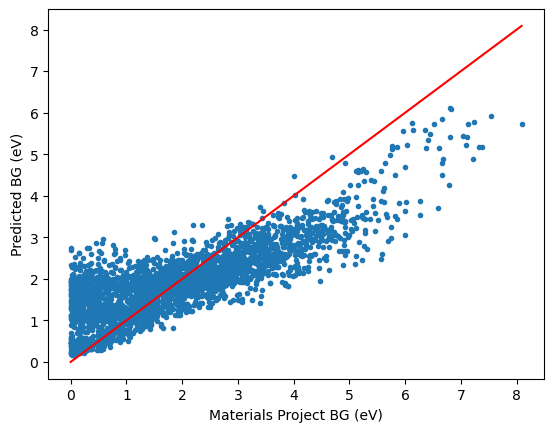

In [286]:
print (len(np.where(y_train==0)[0]))
plt.plot(y_train, y_pred_train, '.')
X = np.linspace(0,np.max(y_train), num=100)
plt.plot(X, X, 'r')
plt.ylabel('Predicted BG (eV)')
plt.xlabel('Materials Project BG (eV)')
plt.show()

### Was having a problem with overfitting. My solution was to set some limits on the RF: max_depth=8, min_samples_leaf=4, min_samples_split=8, max_features='sqrt', criterion='squared_error' (the default). Now I'm left with a poorly trained model, that's no longer overfitting on the training data

0


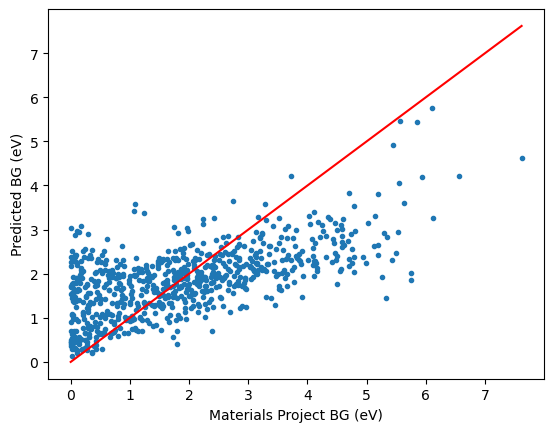

In [287]:
print (len(np.where(Ytest==0)[0]))
plt.plot(Ytest, Ypred, '.')
X = np.linspace(0,np.max(Ytest), num=100)
plt.plot(X, X, 'r')
plt.ylabel('Predicted BG (eV)')
plt.xlabel('Materials Project BG (eV)')
plt.show()

# Just to see what happens when I jack up the data

In [298]:
#Make predictions and evaluate the model:
ToData = '/Users/chimamcgruder/Work_General/ClimateBase/Materials/MLtests/mp_139K_11feat/'
fullDf = pd.read_csv(ToData+'Feature_BandGap_DATA_NOconductors_LatticMatrix.csv')
print ("fullDf.shape:", fullDf.shape)
testingDF = fullDf.sample(frac=0.25) #25% of data for testing 
print ("testingDF.shape:", testingDF.shape)
test_indeces = testingDF.index
print ("len(test_indeces):", len(test_indeces))
print ("max, median, min of test_indeces:", np.max(test_indeces), np.median(test_indeces), np.min(test_indeces))
trainingDF = fullDf.drop(test_indeces) #the rest for training
RF_model, x_trainF, y_trainF = TrainRFR(trainingDF, n_estimators=1000, max_depth=8, min_samples_leaf=4, min_samples_split=8, max_features='sqrt', criterion='squared_error')
x_testF, y_testF = GetXandY(testingDF)#, trainORtest='test')
y_pred_test = RF_model.predict(x_testF)
y_pred_train = RF_model.predict(x_trainF)

fullDf.shape: (38029, 23)
testingDF.shape: (9507, 23)
len(test_indeces): 9507
max, median, min of test_indeces: 38028 18950.0 3


In [300]:
print("\033[1mFor training data:\033[0m")
mae = mean_absolute_error(y_trainF, y_pred_train)
mse = mean_squared_error(y_trainF, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_trainF, y_pred_train)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

print("\033[1mFor test data:\033[0m")
mae = mean_absolute_error(y_testF, y_pred_test)
mse = mean_squared_error(y_testF, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_testF, y_pred_test)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

For training data:
Mean Absolute Error: 0.8683227612956715
Root Mean Squared Error: 1.1088824144033156
R-squared Score: 0.4253038239271115
For test data:
Mean Absolute Error: 0.8987194685101983
Root Mean Squared Error: 1.1504579444278755
R-squared Score: 0.3953187035442226


length of training: 28522 length of testing: 9507


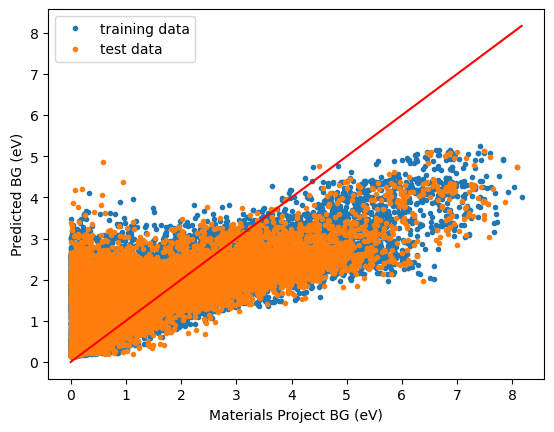

In [305]:
print ("length of training:", len(y_pred_train), "length of testing:", len(y_pred_test))
plt.plot(y_trainF, y_pred_train, '.', label='training data')
plt.plot(y_testF, y_pred_test, '.', label='test data')
X = np.linspace(0,np.max(y_trainF), num=100)
plt.plot(X, X, 'r')
plt.ylabel('Predicted BG (eV)')
plt.xlabel('Materials Project BG (eV)')
plt.legend()
plt.show()